In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

In [2]:
##########loading the data
dataframe=pd.read_csv("nifty50.csv")
dataframe.head()

,index,date,time,open,high,low,close
0,NIFTY,20130401,09:16,5701.15,5704.65,5694.30,5697.00
1,NIFTY,20130401,09:17,5697.05,5698.35,5695.65,5697.50
2,NIFTY,20130401,09:18,5697.90,5697.90,5690.60,5692.15
3,NIFTY,20130401,09:19,5691.65,5694.70,5691.65,5693.90
4,NIFTY,20130401,09:20,5694.40,5695.05,5693.35,5694.55


array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'open'}>],
       [<AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>],
       [<AxesSubplot:title={'center':'close'}>, <AxesSubplot:>]],
      dtype=object)

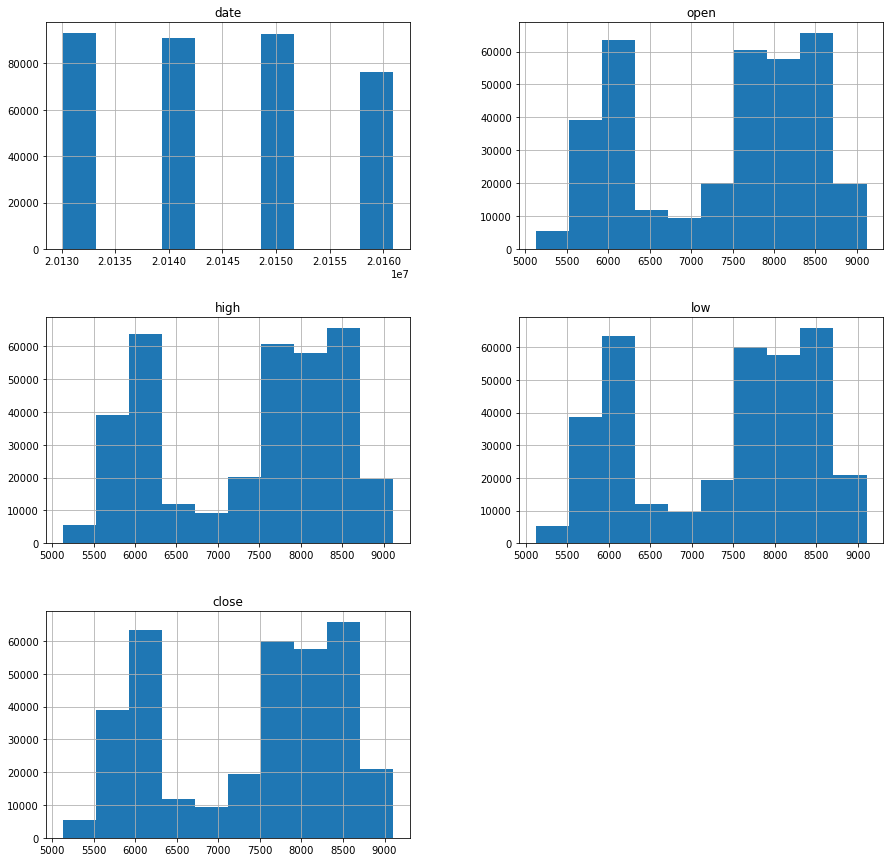

In [3]:
dataframe.hist(figsize=(15,15))

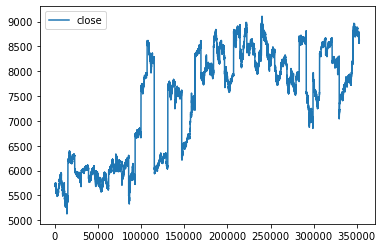

In [8]:
import matplotlib.pyplot as plt

plt.plot(dataframe['close'],label='close')
plt.legend()

In [9]:
dataframe.isnull().sum()

index    0
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

In [10]:
close=dataframe['close']
next_close= close.shift (-1)

In [11]:
dataframe2=pd.DataFrame({})

In [12]:
data=pd.concat([dataframe,next_close],axis=1)

In [13]:
data.head()

,index,date,time,open,high,low,close,close
0,NIFTY,20130401,09:16,5701.15,5704.65,5694.30,5697.00,5697.50
1,NIFTY,20130401,09:17,5697.05,5698.35,5695.65,5697.50,5692.15
2,NIFTY,20130401,09:18,5697.90,5697.90,5690.60,5692.15,5693.90
3,NIFTY,20130401,09:19,5691.65,5694.70,5691.65,5693.90,5694.55
4,NIFTY,20130401,09:20,5694.40,5695.05,5693.35,5694.55,5697.20


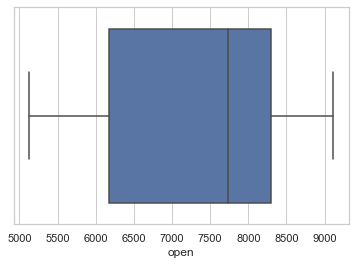

In [15]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=data["open"])

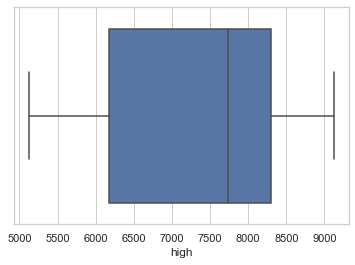

In [17]:
ax = sns.boxplot(x=data["high"])

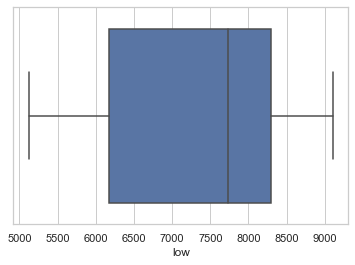

In [19]:
ax = sns.boxplot(x=data["low"])

In [26]:
ax = sns.boxplot(x=data["Close"])

KeyError: 'Close'

In [28]:
ax = sns.boxplot(x=data["turnover"])

KeyError: 'turnover'

In [15]:
data. columns = ['DATE','OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'NEXT_CLOSE']

In [16]:
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,NEXT_CLOSE
0,01-Jan-14,6323.80,6327.2,6298.25,6301.65,2015.36,6221.15
1,02-Jan-14,6301.25,6358.3,6211.30,6221.15,5249.79,6211.15
2,03-Jan-14,6194.55,6221.7,6171.25,6211.15,5369.42,6191.45
3,06-Jan-14,6220.85,6224.7,6170.25,6191.45,4722.67,6162.25
4,07-Jan-14,6203.90,6221.5,6144.75,6162.25,5696.60,6174.60


In [17]:
data = data.dropna()
dataANN=data
dataCNN=data

In [18]:
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,NEXT_CLOSE
0,01-Jan-14,6323.80,6327.2,6298.25,6301.65,2015.36,6221.15
1,02-Jan-14,6301.25,6358.3,6211.30,6221.15,5249.79,6211.15
2,03-Jan-14,6194.55,6221.7,6171.25,6211.15,5369.42,6191.45
3,06-Jan-14,6220.85,6224.7,6170.25,6191.45,4722.67,6162.25
4,07-Jan-14,6203.90,6221.5,6144.75,6162.25,5696.60,6174.60


In [19]:
#corelation matrix
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient()

,OPEN,HIGH,LOW,CLOSE,VOLUME,NEXT_CLOSE
OPEN,1,0.999573,0.999394,0.998855,0.621808,0.99715
HIGH,0.999573,1,0.999359,0.999487,0.626667,0.997874
LOW,0.999394,0.999359,1,0.99956,0.61474,0.997977
CLOSE,0.998855,0.999487,0.99956,1,0.620311,0.998471
VOLUME,0.621808,0.626667,0.61474,0.620311,1,0.620158
NEXT_CLOSE,0.99715,0.997874,0.997977,0.998471,0.620158,1


In [20]:
#limit the digit precision
corr.style.background_gradient().set_precision(2)

,OPEN,HIGH,LOW,CLOSE,VOLUME,NEXT_CLOSE
OPEN,1,1,1,1,0.62,1
HIGH,1,1,1,1,0.63,1
LOW,1,1,1,1,0.61,1
CLOSE,1,1,1,1,0.62,1
VOLUME,0.62,0.63,0.61,0.62,1,0.62
NEXT_CLOSE,1,1,1,1,0.62,1


In [21]:
corr.style.background_gradient().set_properties(**{'font-size': '0pt'})

,OPEN,HIGH,LOW,CLOSE,VOLUME,NEXT_CLOSE
OPEN,1,0.999573,0.999394,0.998855,0.621808,0.99715
HIGH,0.999573,1,0.999359,0.999487,0.626667,0.997874
LOW,0.999394,0.999359,1,0.99956,0.61474,0.997977
CLOSE,0.998855,0.999487,0.99956,1,0.620311,0.998471
VOLUME,0.621808,0.626667,0.61474,0.620311,1,0.620158
NEXT_CLOSE,0.99715,0.997874,0.997977,0.998471,0.620158,1


<Figure size 432x288 with 0 Axes>

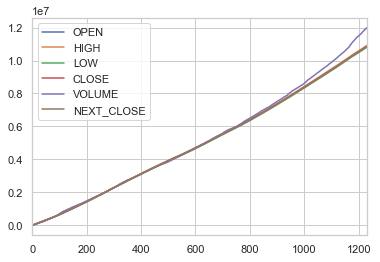

In [22]:
dp = data.cumsum()

plt.figure()

dp.plot()

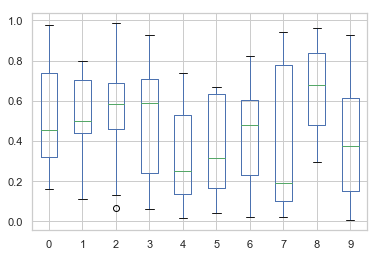

In [23]:
df.plot.box()

In [24]:
#preprocessing
y = data['NEXT_CLOSE']
cols =['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
x=data[cols]


from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x = np. array (x).reshape ((len( x) ,len(cols)))
x = scaler_x.fit_transform (x)

scaler_y = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)
x
y

array([[-0.92322574],
       [-0.92671152],
       [-0.9335785 ],
       ...,
       [ 0.66581846],
       [ 0.69373954],
       [ 0.69466327]])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [26]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout

Using TensorFlow backend.


In [27]:

x_train = x_train.reshape (x_train. shape + (1,)) 
x_test = x_test.reshape (x_test. shape + (1,))
x_train


array([[[-0.9622687 ],
        [-0.9781102 ],
        [-0.96365021],
        [-0.97476297],
        [-0.76511622]],

       [[-0.43749354],
        [-0.44669476],
        [-0.45674375],
        [-0.4632599 ],
        [-0.55453106]],

       [[-0.39386996],
        [-0.39584494],
        [-0.40983521],
        [-0.39150516],
        [-0.63179835]],

       ...,

       [[-0.25750319],
        [-0.26111034],
        [-0.25117704],
        [-0.26554657],
        [-0.64131226]],

       [[-0.26854691],
        [-0.2827041 ],
        [-0.27414665],
        [-0.28851785],
        [-0.7115215 ]],

       [[ 0.93949209],
        [ 0.93784829],
        [ 0.94083639],
        [ 0.94157836],
        [-0.24303194]]])

In [28]:
y_train

array([[-9.56009481e-01],
       [-4.73455800e-01],
       [-4.17474205e-01],
       [-9.33578500e-01],
       [-3.86137061e-01],
       [-1.88632878e-01],
       [ 7.88587563e-01],
       [ 8.77718907e-02],
       [-8.12709147e-02],
       [-1.21758226e-01],
       [-7.76613915e-01],
       [ 6.34045594e-01],
       [-3.41240240e-01],
       [ 2.23978667e-01],
       [-2.91062465e-02],
       [ 5.65062047e-01],
       [ 8.53963330e-01],
       [-1.09383714e-01],
       [ 5.48835750e-01],
       [ 1.84571946e-02],
       [-4.02572504e-01],
       [-5.69227552e-02],
       [-3.18251534e-02],
       [ 6.08965421e-01],
       [ 3.85073898e-01],
       [ 5.60582822e-01],
       [-1.85373675e-01],
       [-6.88615449e-02],
       [-2.24745538e-01],
       [ 3.29894032e-01],
       [ 2.73215282e-01],
       [-9.16010178e-01],
       [-1.37322225e-01],
       [-1.30559816e-01],
       [ 3.33745817e-01],
       [-4.04611684e-01],
       [-2.43481595e-01],
       [-1.65313023e-01],
       [-3.7

In [29]:
seed =2016
np.random.seed (seed)

In [30]:
pred = Sequential()
pred.add (LSTM (  2000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(len(cols), 1) ))
pred.add(Dropout(0.2))
pred.add (Dense (output_dim =1, activation = 'linear'))

C:\Users\Anbu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(2000, activation="tanh", input_shape=(5, 1), recurrent_activation="hard_sigmoid")`
  
C:\Users\Anbu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  after removing the cwd from sys.path.


In [31]:
pred.compile (loss ="mean_squared_error" , optimizer = "adam",metrics=['accuracy'])   

In [32]:
history=pred.fit (x_train, y_train, batch_size =21, epochs =10)

Epoch 1/10
985/985 [==============================] - 56s 57ms/step - loss: 0.0113 - acc: 0.0020
Epoch 2/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0013 - acc: 0.0020
Epoch 3/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0017 - acc: 0.0020
Epoch 4/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0013 - acc: 0.0020
Epoch 5/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0014 - acc: 0.0020
Epoch 6/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0010 - acc: 0.0020
Epoch 7/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0012 - acc: 0.0020
Epoch 8/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0015 - acc: 0.0020
Epoch 9/10
985/985 [==============================] - 50s 51ms/step - loss: 0.0015 - acc: 0.0020
Epoch 10/10
985/985 [==============================] - 53s 54ms/step - loss: 0.0014 - acc: 0.0020


In [33]:
score_train = pred.evaluate (x_train, y_train, batch_size =1)
score_test = pred.evaluate (x_test, y_test, batch_size =1)

 

247/247 [==============================] - 16s 66ms/step


In [34]:
print (" in train MSE = ",  score_train ) 
print (" in test MSE = ", score_test)

 in train MSE =  [0.0007670073561584357, 0.0020304568527918783]
 in test MSE =  [0.0007878599479783315, 0.0]


In [35]:
pred1 = pred.predict (x_test) 
pred1 = scaler_y.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
     

In [36]:
prediction_data = pred1[-1]     

In [37]:
print ("prediction data:")
print (prediction_data)
 

prediction data:
[8926.855]


In [38]:
print ("actual data")
x_test = scaler_x.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
x_test
   

actual data


array([[10398.3 , 10540.15, 10396.35, 10528.35, 11242.05],
       [ 8698.05,  8699.85,  8596.7 ,  8606.  ,  9134.37],
       [ 8255.  ,  8330.95,  8228.2 ,  8324.  ,  5745.04],
       ...,
       [ 8827.95,  8866.4 ,  8795.4 ,  8835.6 ,  9716.57],
       [ 8648.5 ,  8661.05,  8620.9 ,  8650.3 ,  7199.72],
       [ 8968.7 ,  8968.7 ,  8913.35,  8917.95, 11430.95]])

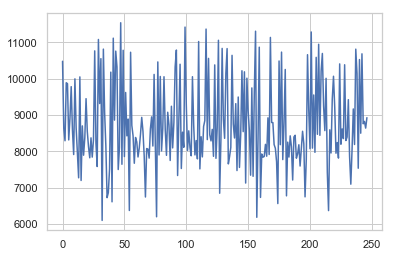

In [39]:
plt.plot(pred1, label="predictions")

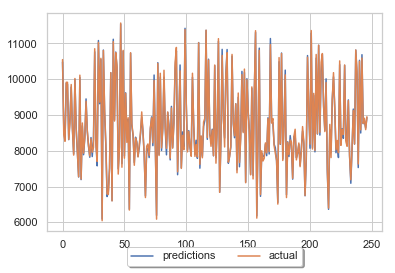

In [40]:
plt.plot(pred1, label="predictions")
y_test = scaler_y.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

In [41]:
#finallly done
pred1

array([[10480.719 ],
       [ 8636.738 ],
       [ 8290.907 ],
       [ 9887.816 ],
       [ 9863.716 ],
       [ 8313.387 ],
       [ 8917.152 ],
       [ 9781.518 ],
       [ 8592.57  ],
       [ 7910.7583],
       [ 9996.938 ],
       [ 8639.638 ],
       [ 7932.6426],
       [ 7269.6865],
       [10050.182 ],
       [ 7196.351 ],
       [ 8700.129 ],
       [ 7892.3066],
       [ 8373.142 ],
       [ 9450.508 ],
       [ 8548.614 ],
       [ 8123.7646],
       [ 7821.07  ],
       [ 8370.758 ],
       [ 7840.497 ],
       [ 8320.587 ],
       [10767.324 ],
       [ 8225.528 ],
       [ 7580.435 ],
       [11081.358 ],
       [ 9316.264 ],
       [10552.539 ],
       [ 6095.7534],
       [10815.809 ],
       [ 9077.395 ],
       [ 8150.4937],
       [ 6722.745 ],
       [ 6861.029 ],
       [ 7511.1484],
       [10181.514 ],
       [ 6607.7847],
       [11117.503 ],
       [ 8859.179 ],
       [10760.305 ],
       [10324.88  ],
       [ 7498.156 ],
       [ 8110.9634],
       [11542

In [42]:
y_test

array([[10548.7 ],
       [ 8448.1 ],
       [ 8267.  ],
       [ 9915.25],
       [ 9914.9 ],
       [ 8319.  ],
       [ 8756.75],
       [ 9852.5 ],
       [ 8638.  ],
       [ 7880.7 ],
       [10020.55],
       [ 8632.6 ],
       [ 7954.35],
       [ 7275.5 ],
       [10114.65],
       [ 7210.75],
       [ 8778.3 ],
       [ 7936.05],
       [ 8398.  ],
       [ 9386.15],
       [ 8565.55],
       [ 8146.3 ],
       [ 7856.55],
       [ 8335.95],
       [ 7960.55],
       [ 8097.  ],
       [10852.9 ],
       [ 8201.05],
       [ 7704.25],
       [11027.7 ],
       [ 9359.9 ],
       [10584.7 ],
       [ 6048.35],
       [10801.85],
       [ 9153.7 ],
       [ 8189.7 ],
       [ 6796.2 ],
       [ 6782.75],
       [ 7510.2 ],
       [10184.85],
       [ 6601.4 ],
       [11049.65],
       [ 8831.55],
       [10741.1 ],
       [10379.35],
       [ 7351.  ],
       [ 8095.95],
       [11570.9 ],
       [ 7542.1 ],
       [10806.6 ],
       [ 7795.7 ],
       [ 9606.9 ],
       [ 823

In [43]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))

80.52390056570786


In [44]:
data=dataANN
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,NEXT_CLOSE
0,01-Jan-14,6323.80,6327.2,6298.25,6301.65,2015.36,6221.15
1,02-Jan-14,6301.25,6358.3,6211.30,6221.15,5249.79,6211.15
2,03-Jan-14,6194.55,6221.7,6171.25,6211.15,5369.42,6191.45
3,06-Jan-14,6220.85,6224.7,6170.25,6191.45,4722.67,6162.25
4,07-Jan-14,6203.90,6221.5,6144.75,6162.25,5696.60,6174.60
